In [4]:
!nvidia-smi

# if this command fails, change runtime type to gpu runtime

Sun Jul 30 11:15:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

In [6]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


Next, let's move the pipeline to GPU to have faster inference.

In [7]:
pipe = pipe.to("cuda")

And we are ready to generate images:

In [34]:
# example prompt = "face of A middle-aged japanese man with a strong jaw and silver streaks in his hair."
prompt = input("Enter a prompt: ")

Enter a prompt: face of a middle-aged indian man with a strong jaw and black hair


  0%|          | 0/50 [00:00<?, ?it/s]

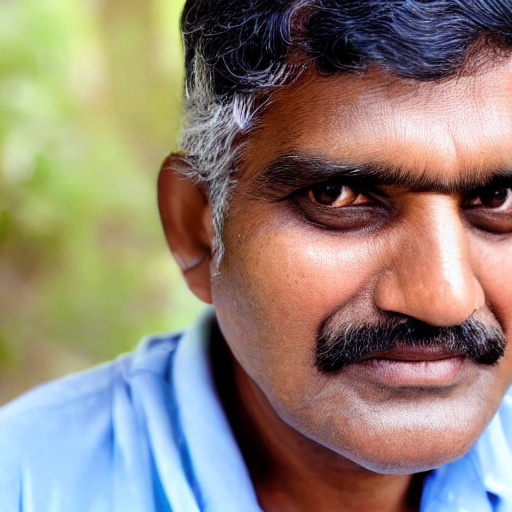

In [35]:
image = pipe(prompt).images[0]

image